# EDA de notre dataset

## Description des données

In [3]:
import pandas as pd

#  Remplace 'data.csv' par le chemin de ton fichier
file_path = "x_train_final_asAbTs5.csv" 
#file_path = "y_train_final_YYyFil7.csv"
df = pd.read_csv(file_path,)


#  Afficher les premières lignes du dataset
print("\n🔹 Aperçu des premières lignes :")
print(df.head())

#  Infos générales sur le dataset
print("\n🔹 Infos sur le dataset :")
print(df.info())

#  Statistiques descriptives (uniquement pour les colonnes numériques)
print("\n🔹 Statistiques descriptives :")
print(df.describe())

#  Vérifier les valeurs manquantes
print("\n🔹 Valeurs manquantes :")
print(df.isnull().sum())

#  Afficher les types de colonnes
print("\n🔹 Types des colonnes :")
print(df.dtypes)

#  Afficher les valeurs uniques pour chaque colonne catégorielle
print("\n🔹 Valeurs uniques des colonnes catégorielles :")
for col in df.select_dtypes(include=["object"]).columns:
    print(f"{col}: {df[col].nunique()} valeurs uniques")

#  Nombre de doublons
print("\n🔹 Nombre de doublons :")
print(df.duplicated().sum())



🔹 Aperçu des premières lignes :
   Unnamed: 0  total_count  longitude_scaled  latitude_scaled  Precipitations  \
0           0            1          0.998417         0.996118             0.0   
1           1           35          0.999222         0.996000             0.0   
2           2            3          0.998371         0.996309             1.8   
3           3            1          0.998804         0.996343             0.0   
4           4            2          0.999126         0.996417             0.0   

   HauteurNeige  Temperature  ForceVent  day_of_week  month_of_year  hour  
0           0.0         14.6        2.5            3              4     8  
1           0.0         22.4        3.1            5              3    13  
2           0.0         11.7        3.3            4             10     8  
3           0.0         28.6        2.6            4              2    16  
4           0.0          9.6        3.2            3              9    18  

🔹 Infos sur le dataset 

## Visualisation des valeurs manquantes et distributions des valeurs

🔹 Valeurs manquantes dans x_train :


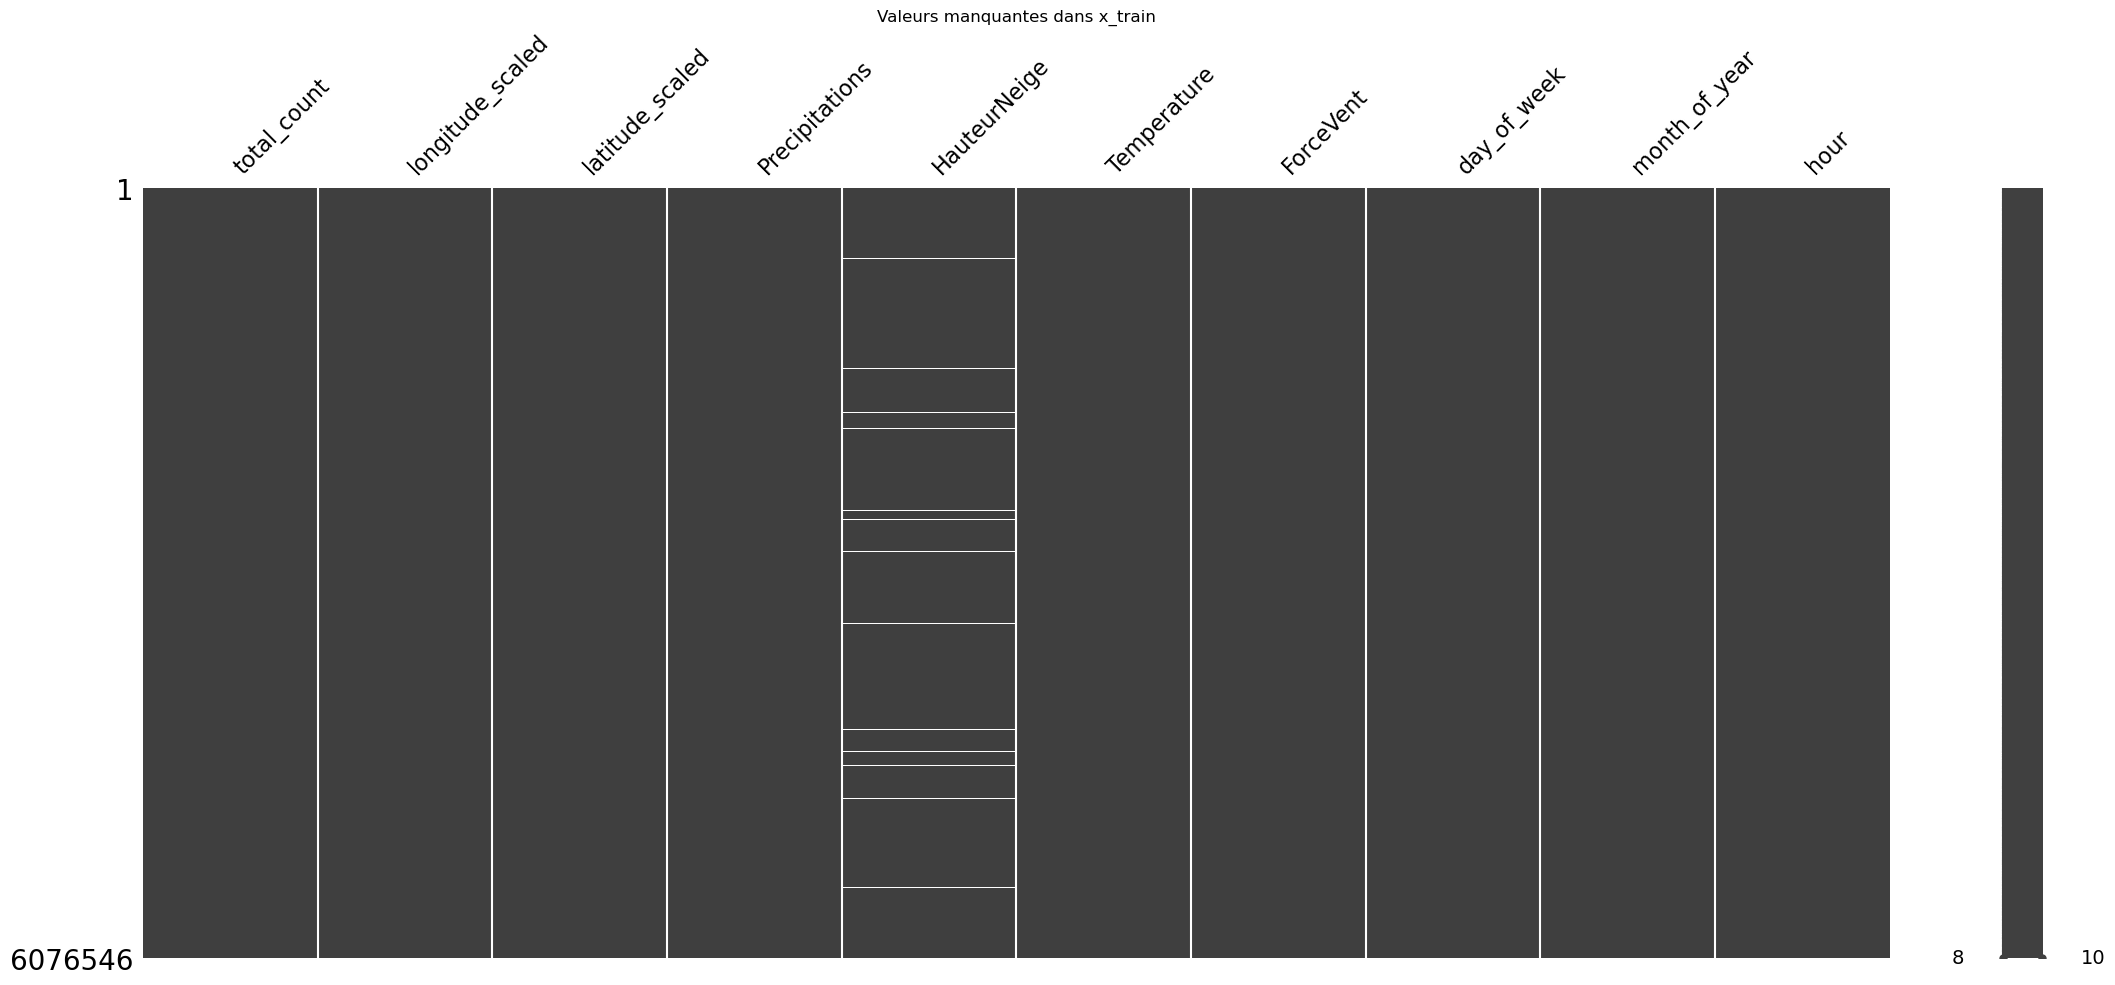

🔹 Valeurs manquantes dans y_train :


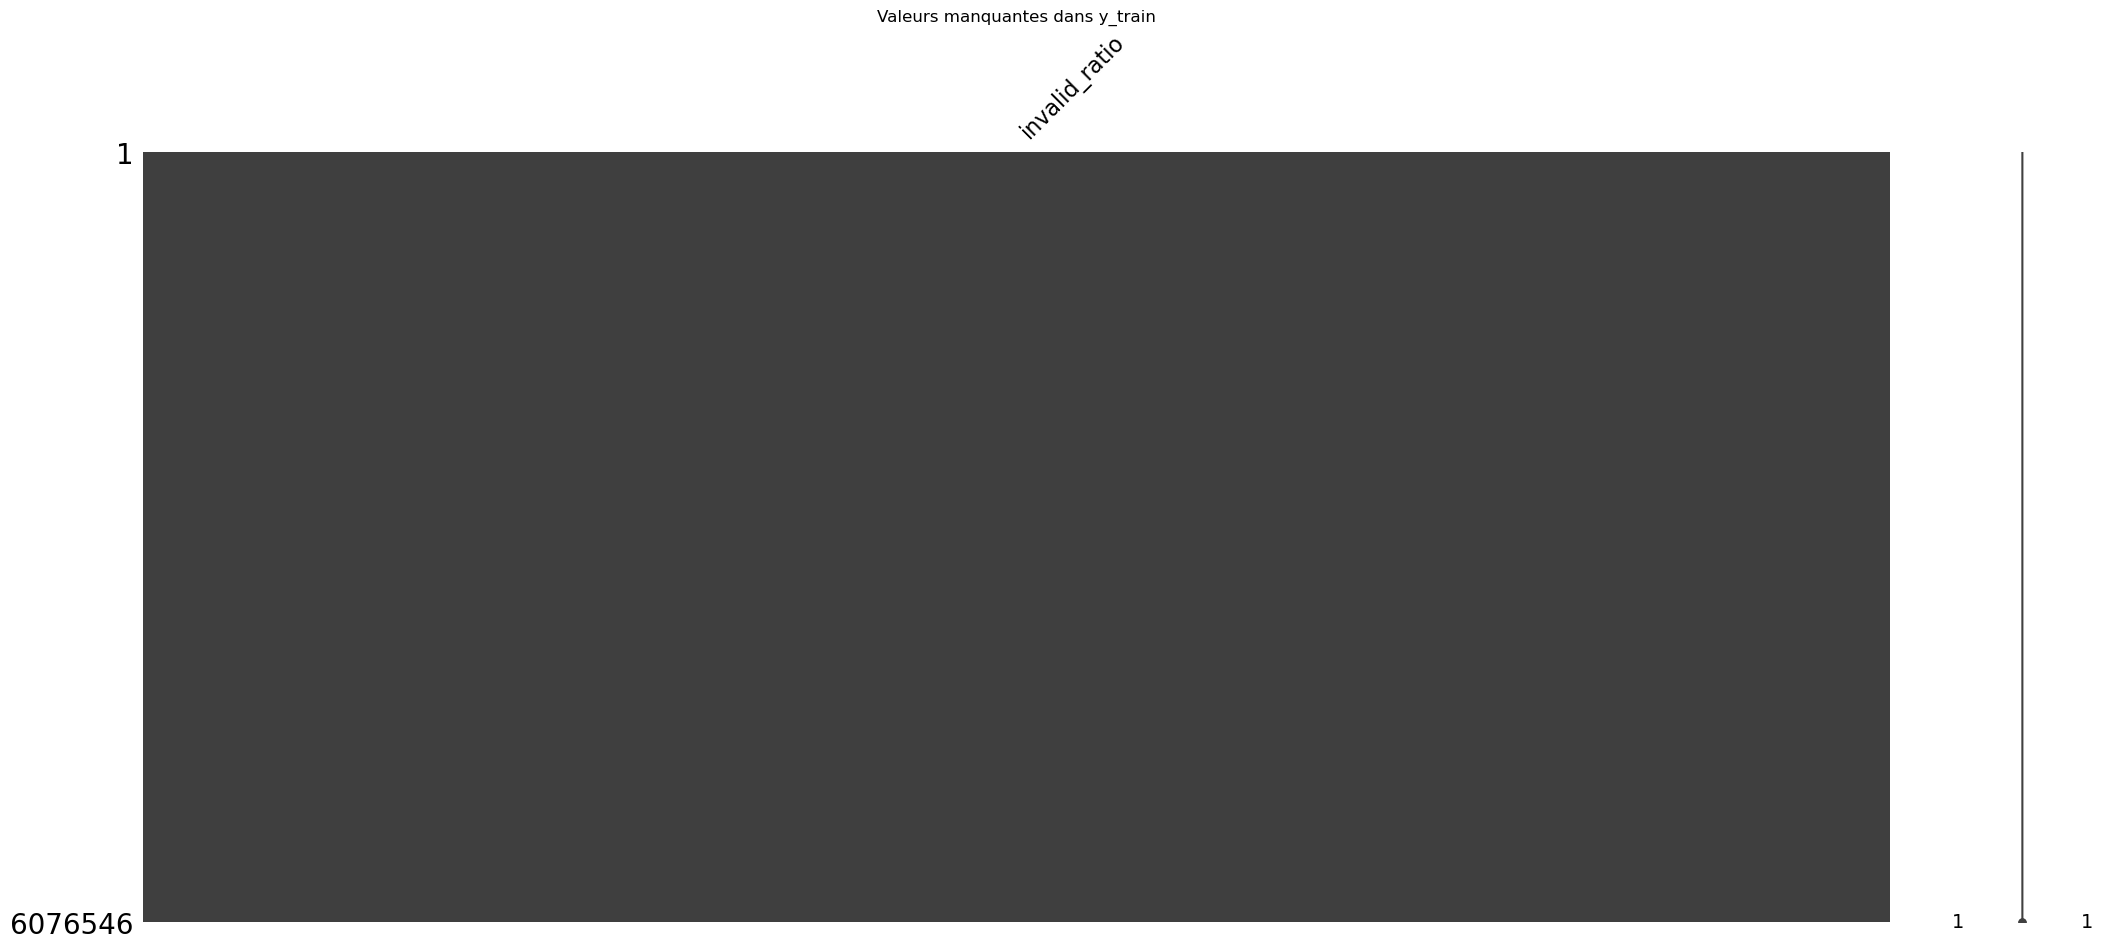

🔹 Distribution des données dans x_train :


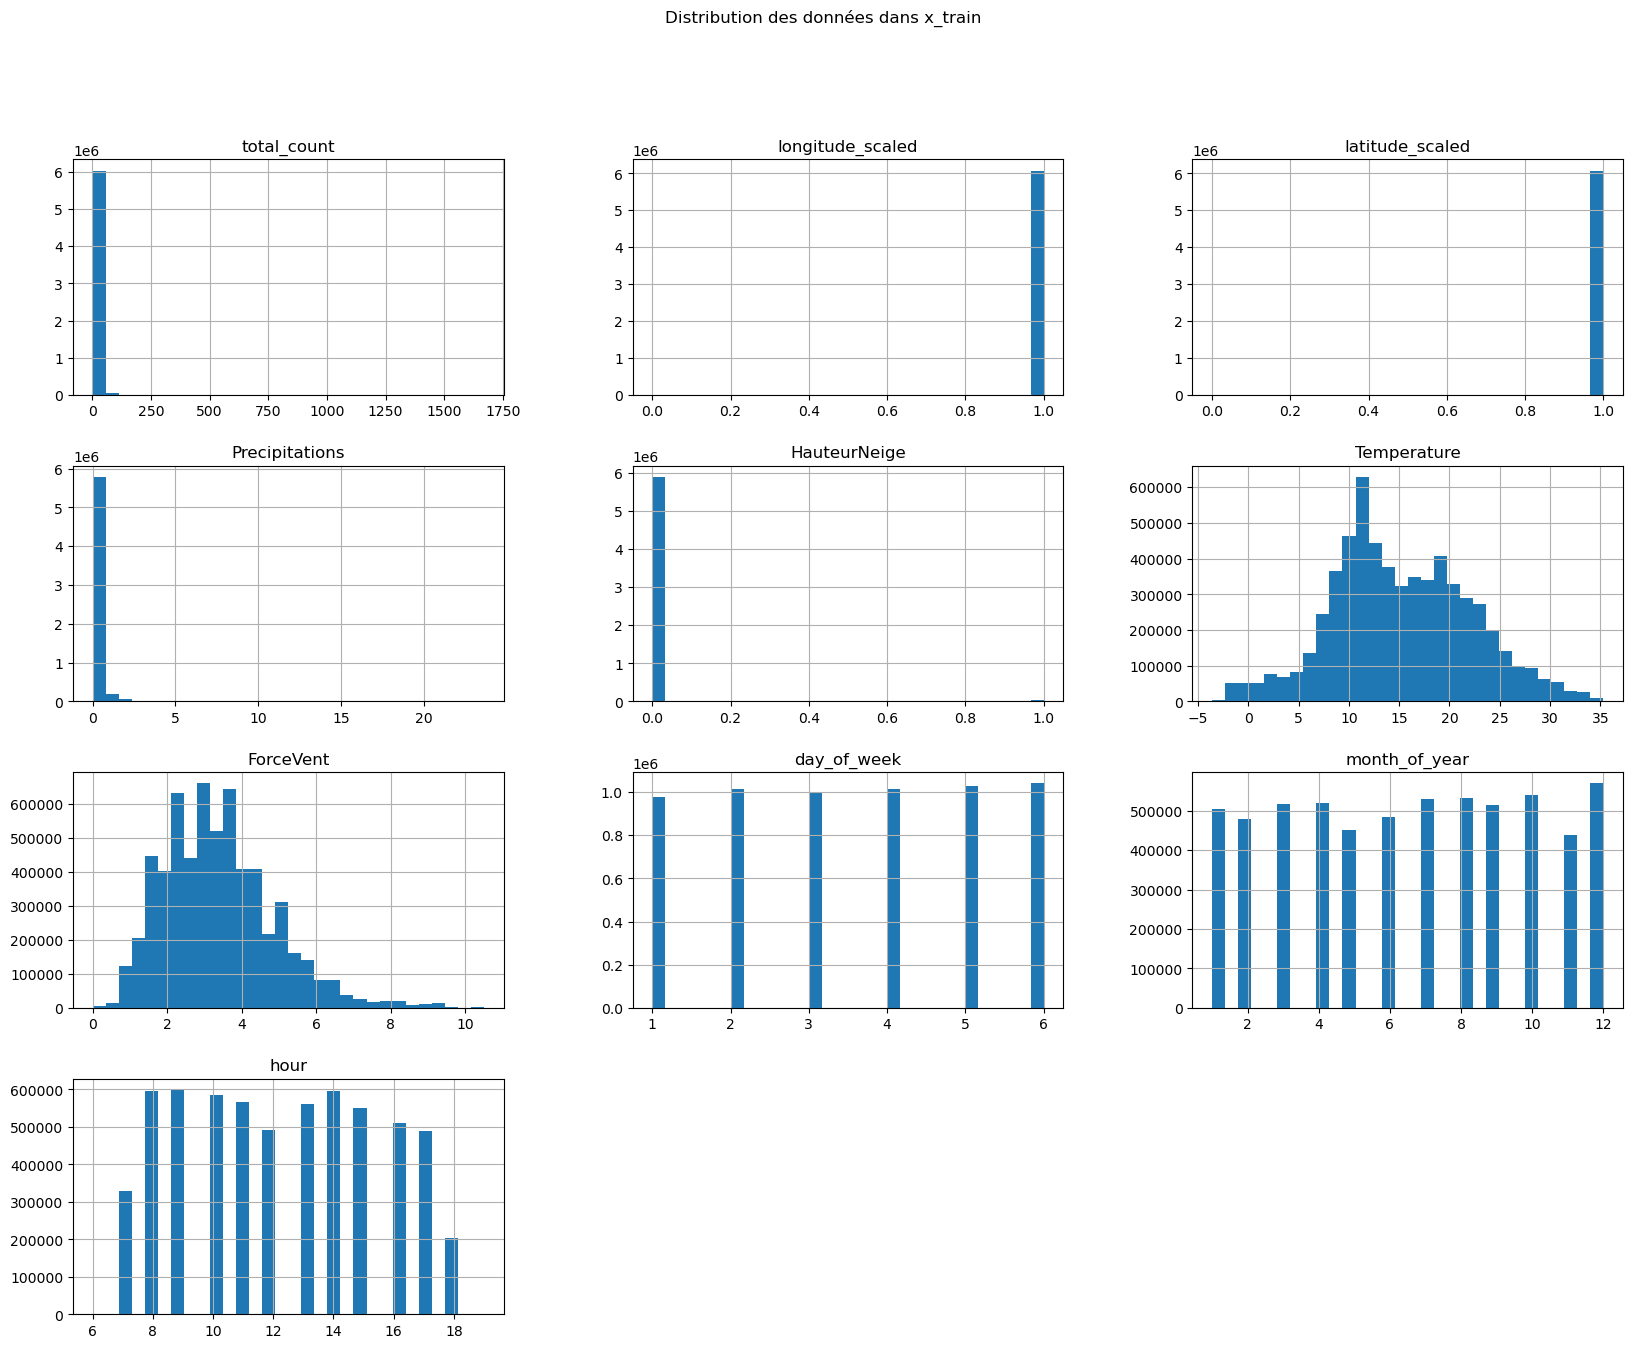

🔹 Distribution des données dans y_train :


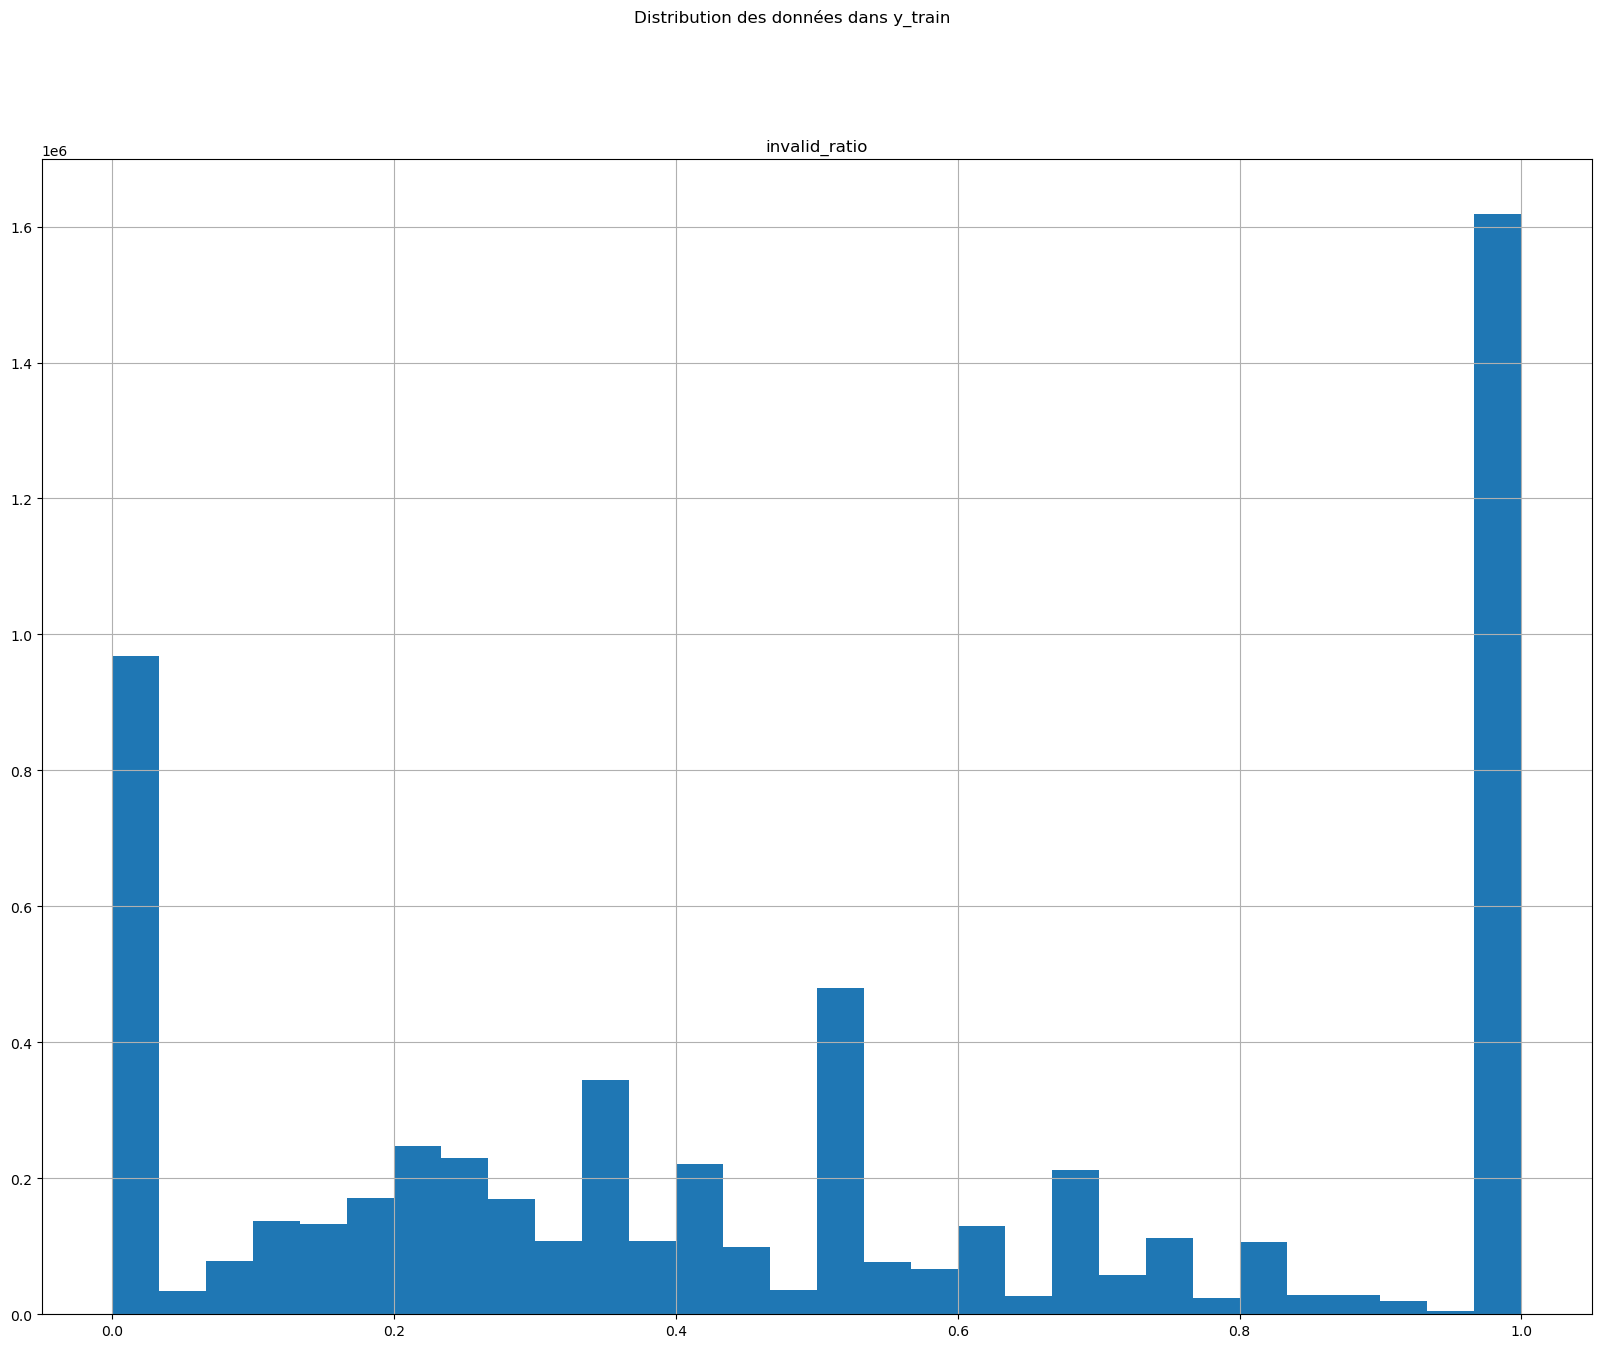

In [2]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt

# Lire les fichiers CSV en utilisant la première colonne comme index
x_train_path = "x_train_final_asAbTs5.csv"
y_train_path = "y_train_final_YYyFil7.csv"

x_train = pd.read_csv(x_train_path, index_col=0)
y_train = pd.read_csv(y_train_path, index_col=0)

# Visualiser les valeurs manquantes avec missingno
def plot_missing_values(df, title):
    msno.matrix(df)
    plt.title(title)
    plt.show()

print("🔹 Valeurs manquantes dans x_train :")
plot_missing_values(x_train, "Valeurs manquantes dans x_train")

print("🔹 Valeurs manquantes dans y_train :")
plot_missing_values(y_train, "Valeurs manquantes dans y_train")

# Tracer des histogrammes pour chaque colonne
def plot_histograms(df, title):
    df.hist(bins=30, figsize=(20, 15))
    plt.suptitle(title)
    plt.show()

print("🔹 Distribution des données dans x_train :")
plot_histograms(x_train, "Distribution des données dans x_train")

print("🔹 Distribution des données dans y_train :")
plot_histograms(y_train, "Distribution des données dans y_train")


## Recherche des valeurs égales à 0 ( notamment pour les latitudes et longitudes pour la détection d'erreur) et distribution de la latitude et longitude sans ces erreurs

Nombre de valeurs égales à 0.0 :
total_count               0
longitude_scaled          2
latitude_scaled           4
Precipitations      5301734
HauteurNeige        5887677
Temperature               0
ForceVent              6796
day_of_week               0
month_of_year             0
hour                      0
dtype: int64

Distribution des données (excluant les 0.0) :


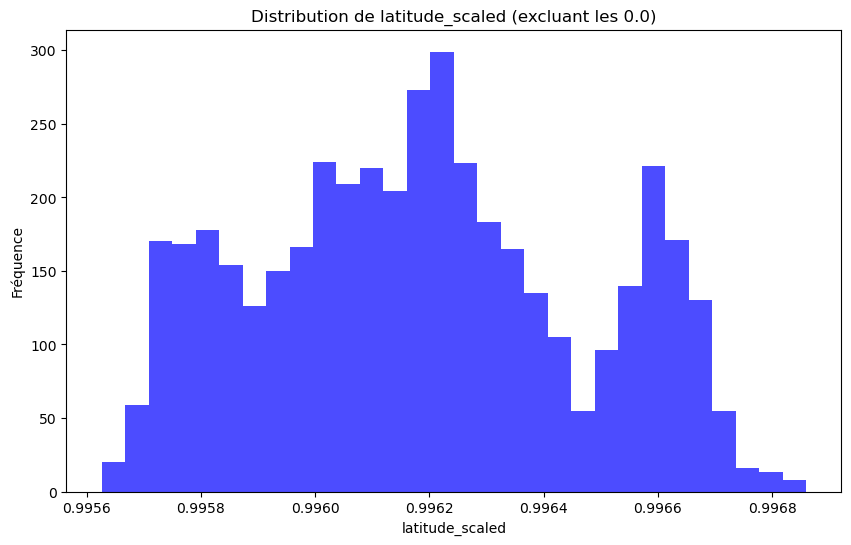

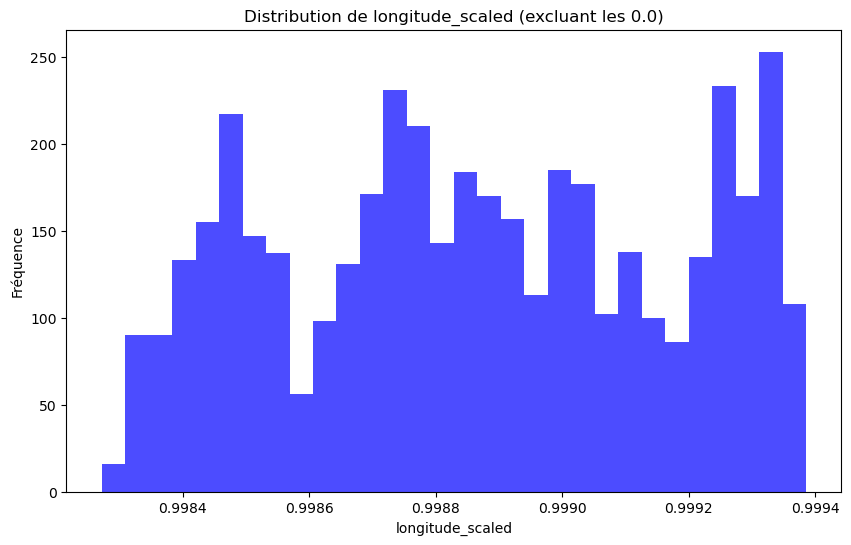

In [10]:
# Compter le nombre de valeurs égales à 0.0
zero_counts = x_train.eq(0.0).sum()

print("Nombre de valeurs égales à 0.0 :")
print(zero_counts)

# Exclure les valeurs égales à 0.0
df_non_zero = x_train[(x_train != 0.0).all(axis=1)]

# Tracer la distribution des données restantes
def plot_distribution(df, column_name):
    plt.figure(figsize=(10, 6))
    plt.hist(df[column_name], bins=30, alpha=0.7, color='blue')
    plt.title(f'Distribution de {column_name} (excluant les 0.0)')
    plt.xlabel(column_name)
    plt.ylabel('Fréquence')
    plt.show()

print("\nDistribution des données (excluant les 0.0) :")
plot_distribution(df_non_zero, 'latitude_scaled')
plot_distribution(df_non_zero, 'longitude_scaled')

## Affichage des lignes avec ces erreurs de position

In [19]:
zero_lat_lon_rows = df[(df['latitude_scaled'] <= 0.95) | (df['longitude_scaled'] <= 0.95)]

print("Lignes avec latitude_scaled et longitude_scaled égales à 0.0 :")
print(len(zero_lat_lon_rows))
print(zero_lat_lon_rows)

Lignes avec latitude_scaled et longitude_scaled égales à 0.0 :
398
         Unnamed: 0  total_count  longitude_scaled  latitude_scaled  \
16359         16359            2          0.980778     2.039470e-07   
31566         31566            2          0.980778     2.039470e-07   
37122         37122           21          0.980778     2.039470e-07   
40463         40463            1          0.980778     0.000000e+00   
44401         44401            1          0.980778     2.039470e-07   
...             ...          ...               ...              ...   
6037035     6037035            4          0.980778     2.039470e-07   
6057257     6057257           41          0.980778     2.039470e-07   
6058224     6058224            1          0.980778     2.039470e-07   
6065802     6065802            1          0.980778     2.039470e-07   
6066407     6066407            2          0.980778     2.039470e-07   

         Precipitations  HauteurNeige  Temperature  ForceVent  day_of_week  \
16

## Affichage du pourcentage de points dans la même zone géographique (Paris)

In [116]:
import pandas as pd

# Chemin vers votre fichier CSV
x_train_path = "x_train_final_asAbTs5.csv"

# Lire le fichier CSV en utilisant la première colonne comme index
x_train = pd.read_csv(x_train_path, index_col=0)

# Vérifiez que les colonnes existent dans le DataFrame
if 'longitude_scaled' in x_train.columns and 'latitude_scaled' in x_train.columns:
    # Définir les limites géographiques approximatives de Paris
    paris_lat_min, paris_lat_max = 0.9955, 0.9975 # Exemple de limites pour la latitude scaled
    paris_lon_min, paris_lon_max = 0.998, 1.00  # Exemple de limites pour la longitude scaled

    # Compter les points à l'intérieur de la zone de Paris
    inside_paris = x_train[
        (x_train['latitude_scaled'] >= paris_lat_min) & (x_train['latitude_scaled'] <= paris_lat_max) &
        (x_train['longitude_scaled'] >= paris_lon_min) & (x_train['longitude_scaled'] <= paris_lon_max)
    ]

    # Compter les points à l'extérieur de la zone de Paris
    outside_paris = x_train[
        ~((x_train['latitude_scaled'] >= paris_lat_min) & (x_train['latitude_scaled'] <= paris_lat_max) &
          (x_train['longitude_scaled'] >= paris_lon_min) & (x_train['longitude_scaled'] <= paris_lon_max))
    ]

    # Calculer les proportions
    total_points = len(x_train)
    proportion_inside = len(inside_paris) / total_points
    proportion_outside = len(outside_paris) / total_points

    print(f"Proportion de points à l'intérieur de Paris : {proportion_inside:.5%}")
    print(f"Proportion de points à l'extérieur de Paris : {proportion_outside:.5%}")
else:
    print("Les colonnes 'longitude_scaled' et/ou 'latitude_scaled' n'existent pas dans le fichier.")


Proportion de points à l'intérieur de Paris : 99.99330%
Proportion de points à l'extérieur de Paris : 0.00670%


## Affichage des points autour de cette zone (Reconnaissance des frontières de Paris intra-muros)

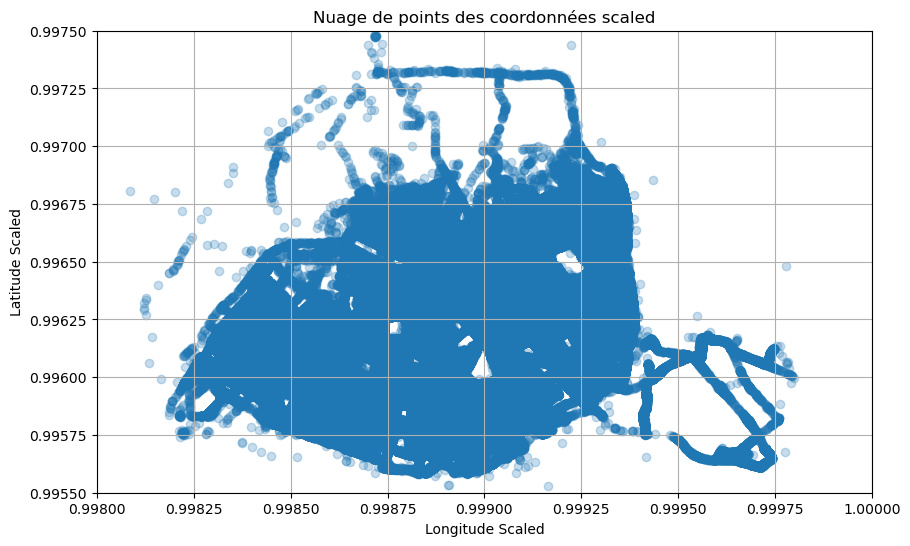

In [112]:
import pandas as pd
import matplotlib.pyplot as plt

# Chemin vers votre fichier CSV
x_train_path = "x_train_final_asAbTs5.csv"

# Lire le fichier CSV en utilisant la première colonne comme index
x_train = pd.read_csv(x_train_path, index_col=0)

# Vérifiez que les colonnes existent dans le DataFrame
if 'longitude_scaled' in x_train.columns and 'latitude_scaled' in x_train.columns:
    # Tracer le nuage de points
    plt.figure(figsize=(10, 6))
    plt.scatter(x_train['longitude_scaled'], x_train['latitude_scaled'], alpha=0.25)
    plt.title('Nuage de points des coordonnées scaled')
    plt.xlabel('Longitude Scaled')
    plt.ylabel('Latitude Scaled')
    # Définir les limites des axes pour zoomer
    plt.xlim(0.998, 1.00)  # Exemple de limites pour l'axe x
    plt.ylim(0.9955, 0.9975)  # Exemple de limites pour l'axe y
    plt.grid(True)
    plt.show()
else:
    print("Les colonnes 'longitude_scaled' et/ou 'latitude_scaled' n'existent pas dans le fichier.")


## Création de carte Folium et visualisation de 5000 points sur openstreetmap et calibration des coordonnées d'entrée (données normalisées) avec la vraie position géographique 

In [110]:
import pandas as pd
import folium


# Valeurs minimales et maximales réelles pour Paris
lat_min, lat_max = 48.8179, 48.9007
lon_min, lon_max = 2.26755, 2.4644

# Appliquer la transformation inverse
scaled_min_lat, scaled_max_lat = 0.99562, 0.99732
scaled_min_long, scaled_max_long = 0.99824, 0.99976

# Fonction pour inverser le Min-Max scaling
def inverse_min_max_scaling(scaled_value, min_value, max_value):
    return scaled_value * (max_value - min_value) + min_value



x_train['latitude'] = x_train['latitude_scaled'].apply(lambda x: inverse_min_max_scaling((x - scaled_min_lat) / (scaled_max_lat - scaled_min_lat), lat_min, lat_max))
x_train['longitude'] = x_train['longitude_scaled'].apply(lambda x: inverse_min_max_scaling((x - scaled_min_long) / (scaled_max_long - scaled_min_long), lon_min, lon_max))

# Échantillonner 5 000 points
df_sample = x_train.sample(n=5000, replace=True, random_state=2)

# Créer une carte centrée sur Paris
m = folium.Map(location=[48.8566, 2.3522], zoom_start=12)

# Ajouter les points échantillonnés à la carte
for _, row in df_sample.iterrows():
    folium.Marker([row['latitude'], row['longitude']]).add_to(m)



# Sauvegarder la carte dans un fichier HTML
map_file = "paris_map_sample.html"
m.save(map_file)

print(f"Carte enregistrée sous le nom : {map_file}")


Carte enregistrée sous le nom : paris_map_sample.html


## Affichage de l'ensemble des points sur openstreetmap

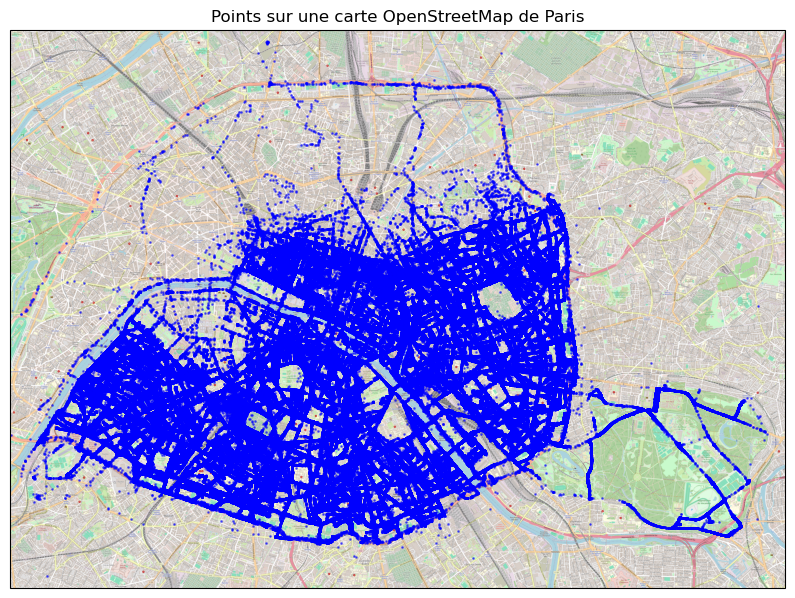

In [111]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.io.img_tiles as cimgt

# Créer une carte avec cartopy et OpenStreetMap
osm_tiles = cimgt.OSM()

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': osm_tiles.crs})
ax.set_extent([lon_min-0.01, lon_max+0.01, lat_min-0.01, lat_max+0.01], crs=ccrs.Geodetic())
ax.add_image(osm_tiles, 15)

# Ajouter les points à la carte
ax.scatter(x_train['longitude'], x_train['latitude'], color='blue', s=1, alpha=0.5, transform=ccrs.Geodetic())

plt.title('Points sur une carte OpenStreetMap de Paris')
plt.show()